In [ ]:
# Basic Importation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supress Warnings
import warnings
warnings.filterwarnings("ignore")

**DATA LOADING**

In [ ]:
# Import dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
phishing_df_3 = pd.read_csv("/content/drive/MyDrive/Dataset/Enron.csv")
phishing_df_3.head()

,subject,body,label
0,"hpl nom for may 25 , 2001",( see attached file : hplno 525 . xls )\n- hpl...,0
1,re : nom / actual vols for 24 th,- - - - - - - - - - - - - - - - - - - - - - fo...,0
2,"enron actuals for march 30 - april 1 , 201","estimated actuals\nmarch 30 , 2001\nno flow\nm...",0
3,"hpl nom for may 30 , 2001",( see attached file : hplno 530 . xls )\n- hpl...,0
4,"hpl nom for june 1 , 2001",( see attached file : hplno 601 . xls )\n- hpl...,0


In [ ]:
phishing_df_3.shape

(29767, 3)

In [ ]:
phishing_df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29767 entries, 0 to 29766
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  29569 non-null  object
 1   body     29767 non-null  object
 2   label    29767 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 697.8+ KB


In [ ]:
# Get the counts of the two email types
phishing_df_3["label"].value_counts()

,count
label,
0,15791
1,13976


**DATA PREPROCESSING AND FEATURE SELECTION**

In [ ]:
# Preprocessing
import nltk
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("punkt_tab")
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import tokenize
import string
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
phishing_df_3.drop(columns=["subject"], inplace=True)
phishing_df_3.head()

,body,label
0,( see attached file : hplno 525 . xls )\n- hpl...,0
1,- - - - - - - - - - - - - - - - - - - - - - fo...,0
2,"estimated actuals\nmarch 30 , 2001\nno flow\nm...",0
3,( see attached file : hplno 530 . xls )\n- hpl...,0
4,( see attached file : hplno 601 . xls )\n- hpl...,0


In [ ]:
# Check for missing values
phishing_df_3.isna().sum()

,0
body,0
label,0


In [ ]:
phishing_df_3 = phishing_df_3.rename(columns={"body": "Email Text"})
phishing_df_3.head()

,Email Text,label
0,( see attached file : hplno 525 . xls )\n- hpl...,0
1,- - - - - - - - - - - - - - - - - - - - - - fo...,0
2,"estimated actuals\nmarch 30 , 2001\nno flow\nm...",0
3,( see attached file : hplno 530 . xls )\n- hpl...,0
4,( see attached file : hplno 601 . xls )\n- hpl...,0


In [ ]:
# Check rows with "empty" value
phishing_df_3["Email Text"].apply(lambda x: x.strip().lower()=="empty").sum()

0

In [ ]:
# Check for duplicates
duplicates = phishing_df_3[phishing_df_3.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Email Text, label]
Index: []


In [ ]:
"""
# Remove duplicates
phishing_df = phishing_df.drop_duplicates(keep='first')
phishing_df.duplicated().sum()
"""

"\n# Remove duplicates\nphishing_df = phishing_df.drop_duplicates(keep='first')\nphishing_df.duplicated().sum()\n"

In [ ]:
# Rename columns
phishing_df_3 = phishing_df_3.rename(columns={"Email Text": "text"})
phishing_df_3.head()

,text,label
0,( see attached file : hplno 525 . xls )\n- hpl...,0
1,- - - - - - - - - - - - - - - - - - - - - - fo...,0
2,"estimated actuals\nmarch 30 , 2001\nno flow\nm...",0
3,( see attached file : hplno 530 . xls )\n- hpl...,0
4,( see attached file : hplno 601 . xls )\n- hpl...,0


**Exploratory Data Analysis (EDA)**

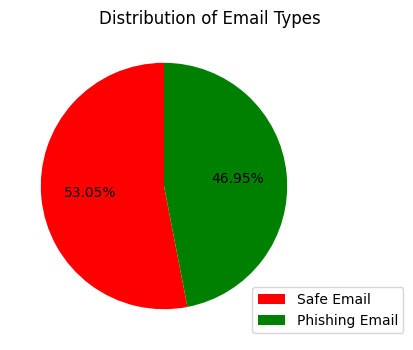

In [ ]:
# Count the values of each Email Type
label_counts = phishing_df_3["label"].value_counts()
email_types = label_counts.index.tolist()

# Define colors for mapping
color_map = {
    0 : "red",
    1 : "green"}

# Map the colors to each Email Type
colors = [color_map.get(email_type, 'gray') for email_type in email_types]

# Create the pie chart with the custom colors
plt.figure(figsize=(7, 4))
plt.pie(label_counts, colors=colors, autopct='%.2f%%', startangle=90)
plt.legend(["Safe Email", "Phishing Email"], loc="lower right", bbox_to_anchor=(1.3, 0))
plt.title("Distribution of Email Types", x=0.65)

# Show the chart
plt.show()

In [ ]:
# Get the counts of the two email types
phishing_df_3["label"].value_counts()

,count
label,
0,15791
1,13976


In [ ]:
sw = stopwords.words("english") + ["u", "ü", "ur", "4", "2", "im", "dont", "doin", "ure"]
ps = PorterStemmer()

def text_preprocessing(text):
  text = text.strip().lower() # Strip and Lowercase
  text = re.sub(r"http\S+", '', text) # Remove Hyperlinks
  text = re.sub('[^a-z0-9]', ' ', text) # Remove Special Characters including Punctuations
  words = tokenize.word_tokenize(text) # Tokenize the Text
  filtered_words = [ps.stem(word) for word in words if word not in sw] # Filter Stopwords and Stem Words
  transformed_text = " ".join(filtered_words)
  return transformed_text

phishing_df_3["cleaned text"] = phishing_df_3["text"].apply(text_preprocessing)
cleaned_df_3 = phishing_df_3[["cleaned text", "label"]]
cleaned_df_3.head()

,cleaned text,label
0,see attach file hplno 525 xl hplno 525 xl,0
1,forward sabra zajac hou ect 05 30 2001 12 07 p...,0
2,estim actual march 30 2001 flow march 31 2001 ...,0
3,see attach file hplno 530 xl hplno 530 xl,0
4,see attach file hplno 601 xl hplno 601 xl,0


In [ ]:
# Remove empty row after preprocessing
cleaned_df_3 = cleaned_df_3[~(cleaned_df_3["cleaned text"].apply(lambda x: x==""))]
cleaned_df_3["cleaned text"].apply(lambda x: x=="").sum()

0

In [ ]:
# Shuffle the dataframe
cleaned_df_3 = cleaned_df_3.sample(frac=1, random_state=15).reset_index(drop=True)
cleaned_df_3.head()

,cleaned text,label
0,perform origin messag issuealert scientech com...,0
1,w w highhest qualiti medd great offfer v codin...,1
2,make r cher might need bundi 1 w ndow x p pro ...,1
3,drug chemic ident brand name equival except pr...,1
4,team project request spreadsheet develop facil...,0



**DATA SPLITTING AND FEATURE TRANSFORMATION**

In [ ]:
# Train - Test Split
from sklearn.model_selection import train_test_split

# Data Transformation
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
cleaned_df_3 = cleaned_df_3.rename(columns={"label": "label enc"})
cleaned_df_3.head()

,cleaned text,label enc
0,perform origin messag issuealert scientech com...,0
1,w w highhest qualiti medd great offfer v codin...,1
2,make r cher might need bundi 1 w ndow x p pro ...,1
3,drug chemic ident brand name equival except pr...,1
4,team project request spreadsheet develop facil...,0


In [ ]:
# Save the Cleaned Dataset to personal Google Drive account
cleaned_df_3.to_csv("/content/drive/MyDrive/Dataset/cleaned_Enron.csv", index=False)

In [ ]:
# Define Features and Target as X and y respectively
X, y = cleaned_df_3["cleaned text"], cleaned_df_3["label enc"]

# Split the Cleaned Dataset into the ratio of 7:3
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=15
)

print(f"X_train Shape: {X_train.shape} - y_train Shape: {y_train.shape}")
print(f"X_test Shape: {X_test.shape} - y_test Shape: {y_test.shape}")

X_train Shape: (20827,) - y_train Shape: (20827,)
X_test Shape: (8926,) - y_test Shape: (8926,)


In [ ]:
# Initialize TF-IDF
tfidf = TfidfVectorizer(ngram_range=(1, 2), max_features=10000)

# Fit and Transform X_train
X_train_tfidf = tfidf.fit_transform(X_train)

# Transform X_test
X_test_tfidf = tfidf.transform(X_test)

# Inspect Dimensions
X_train_tfidf.shape, X_test_tfidf.shape

((20827, 10000), (8926, 10000))

In [ ]:
sparsity = (1.0 - (X_train_tfidf.nnz / float(X_train_tfidf.shape[0] * X_train_tfidf.shape[1]))) * 100
print(f"Sparsity Percentage of the TF-IDF Matrix: {sparsity:.2f}%")

Sparsity Percentage of the TF-IDF Matrix: 99.09%


**HYPERPARAMETER TUNING AND MODEL TRAINING**

In [ ]:
# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Cross-Validation
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=15)

**Logistic Regression**

In [ ]:
"""
grid_lr_1 = {
    "C": np.logspace(-2, 2, 10),
    "penalty": ["l1", "l2", "none"],
    "solver": ["lbfgs", "liblinear", "saga"],
}

scoring = ["accuracy", "precision", "recall", "f1"]

algo_lr_1 = GridSearchCV(LogisticRegression(max_iter=1000), param_grid=grid_lr_1, cv=kfold, scoring=scoring, refit="f1")

model_lr_1 = algo_lr_1.fit(X_train_tfidf, y_train)
lr_1_best_params = model_lr_1.best_estimator_

print("penalty:", lr_1_best_params.get_params()["penalty"])
print("C:", lr_1_best_params.get_params()["C"])
print("solver:", lr_1_best_params.get_params()["solver"])
"""

'\ngrid_lr_1 = {\n    "C": np.logspace(-2, 2, 10),\n    "penalty": ["l1", "l2", "none"],\n    "solver": ["lbfgs", "liblinear", "saga"],\n}\n\nscoring = ["accuracy", "precision", "recall", "f1"]\n\nalgo_lr_1 = GridSearchCV(LogisticRegression(max_iter=1000), param_grid=grid_lr_1, cv=kfold, scoring=scoring, refit="f1")\n\nmodel_lr_1 = algo_lr_1.fit(X_train_tfidf, y_train)\nlr_1_best_params = model_lr_1.best_estimator_\n\nprint("penalty:", lr_1_best_params.get_params()["penalty"])\nprint("C:", lr_1_best_params.get_params()["C"])\nprint("solver:", lr_1_best_params.get_params()["solver"])\n'

In [ ]:
C = np.logspace(-2, 2, 10)
C_ = C[7]

In [ ]:
algo_lr_1 = LogisticRegression(C=C_, penalty="l2", solver="liblinear")

In [ ]:
model_lr_1 = algo_lr_1.fit(X_train_tfidf, y_train)

In [ ]:
y_pred_lr_1 = model_lr_1.predict(X_test_tfidf)

**Support Vector Machine**

In [ ]:
"""
grid_svc_1 = {
    "C": [0.01, 0.1, 1, 10, 100],
    "kernel": ["linear", "poly", "rbf"],
    "gamma": ["scale", "auto"]
}

scoring = ["accuracy", "precision", "recall", "f1"]

algo_svc_1 = GridSearchCV(SVC(), param_grid=grid_svc_1, cv=kfold, scoring=scoring, refit="f1")

model_svc_1 = algo_svc_1.fit(X_train_tfidf, y_train)
svc_1_best_params = model_svc_1.best_estimator_

print("C:", svc_1_best_params.get_params()["C"])
print("kernel:", svc_1_best_params.get_params()["kernel"])
print("gamma:", svc_1_best_params.get_params()["gamma"])
"""

'\ngrid_svc_1 = {\n    "C": [0.01, 0.1, 1, 10, 100],\n    "kernel": ["linear", "poly", "rbf"],\n    "gamma": ["scale", "auto"]\n}\n\nscoring = ["accuracy", "precision", "recall", "f1"]\n\nalgo_svc_1 = GridSearchCV(SVC(), param_grid=grid_svc_1, cv=kfold, scoring=scoring, refit="f1")\n\nmodel_svc_1 = algo_svc_1.fit(X_train_tfidf, y_train)\nsvc_1_best_params = model_svc_1.best_estimator_\n\nprint("C:", svc_1_best_params.get_params()["C"])\nprint("kernel:", svc_1_best_params.get_params()["kernel"])\nprint("gamma:", svc_1_best_params.get_params()["gamma"])\n'

In [ ]:
algo_svc_1 = SVC(C=10, gamma="scale", kernel="rbf")
model_svc_1 = algo_svc_1.fit(X_train_tfidf, y_train)

In [ ]:
y_pred_svc_1 = model_svc_1.predict(X_test_tfidf)

**EVALUATION**

**Logistic Regression**

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4761
           1       0.98      0.99      0.99      4165

    accuracy                           0.99      8926
   macro avg       0.99      0.99      0.99      8926
weighted avg       0.99      0.99      0.99      8926



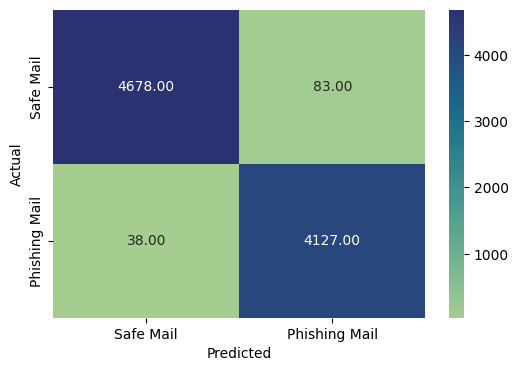

In [ ]:
print(classification_report(y_test, y_pred_lr_1))
cm_lr = confusion_matrix(y_test, y_pred_lr_1)
plt.figure(figsize=(6,4))
sns.heatmap(
    cm_lr, annot=True,
    fmt='.2f',
    xticklabels=["Safe Mail", "Phishing Mail"],
    yticklabels=["Safe Mail", "Phishing Mail"],
    cmap="crest"
)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

**Support Vector Machine**

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4761
           1       0.98      0.99      0.99      4165

    accuracy                           0.99      8926
   macro avg       0.99      0.99      0.99      8926
weighted avg       0.99      0.99      0.99      8926



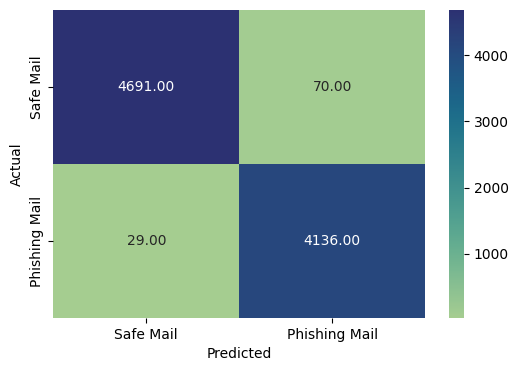

In [ ]:
print(classification_report(y_test, y_pred_svc_1))
cm_svc = confusion_matrix(y_test, y_pred_svc_1)
plt.figure(figsize=(6,4))
sns.heatmap(
    cm_svc, annot=True,
    fmt='.2f',
    xticklabels=["Safe Mail", "Phishing Mail"],
    yticklabels=["Safe Mail", "Phishing Mail"],
    cmap="crest"
)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [ ]:
print("LR - f1 score:", f1_score(y_test, y_pred_lr_1))
print("SVM - f1 score:", f1_score(y_test, y_pred_svc_1))

LR - f1 score: 0.9855522388059702
SVM - f1 score: 0.988173455978975
